## Lab 02 - Pandas and Data Visualization
This notebook will introduce you to the basics of Pandas and Data Visualization. You will learn how to load data into a Pandas DataFrame, how to perform basic data analysis, and how to visualize data. The first part of this notebook will be an interactive tutorial, and the second part will be practice exercises for you to do! **Note that the practice problems will be checked when submitted!**

#### Pandas
Pandas is a popular open-source Python library that provides data structures and data analysis tools for working with structured data. Pandas is a versatile library that simplifies data manipulation, analysis, and exploration in Python. Some of its uses:
* Tabular Data Handling
* Data Cleaning and Transformation
* Data Exploration
* Data Import/Export
* Data Visualization

#### Matplotlib
Matplotlib is a widely used for creating static, animated, and interactive visualizations. Whether you are conducting data analysis, scientific research, or data communication, Matplotlib helps you present your findings effectively and intuitively.

### Pre-requisites

In [1]:
# In case you don't have pandas, uncomment
# the following lines and run the cell

# %pip install pandas

### Overview
In this notebook, you will be learning how to use the Pandas library by working with the `cookies.csv` file. 

#### `cookies.csv` file :

The `cookies.csv` file contains information about cookies that were made in Rico's Bisquito's factory. 

The columns are the following:

`cookie`: the name of a cookie
`ingredients`: a list of the cookie's ingredients
`calories`: the number of calories the created cookie has
`radius`: the radius of the created cookie, in cm
`cost_to_make`: the cost it took to make the created cookie, in dollars

### Reading the CSV file

First, we need to import the Pandas library. We will be using the `pd` alias for the Pandas library.

In [14]:
#TODO: import pandas and matplotlib in this cell

import pandas as pd
import matplotlib.pyplot as plt

We will now look at the `cookies.csv` file. We will use the `pd.read_csv()` function to read in the CSV file. We will store the data in a variable called `cookies`.

In [15]:
#TODO: read the cookies.csv file into a pandas dataframe

cookies = pd.read_csv("cookies.csv")


#### Dataframe
Dataframes are a data structure that Pandas uses to store data. Dataframes are similar to tables in a database. Dataframes have rows and columns. Each row represents a single data point, and each column represents a feature of the data point.

We will then make sure we imported the data correctly by printing out the first 10 rows of the data, using the `head()` function.

In [16]:
#TODO: print the head of the dataframe

print(cookies.head(10))

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
3  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
4  bad berry bunny           ["flour","blueberries","sugar","butter"]   
5     orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
6      minty miami          ["flour","mint extract","sugar","butter"]   
7        chocolate       ["flour","chocolate chips","sugar","butter"]   
8     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
9      minty miami          ["flour","mint extract","sugar","butter"]   

   calories  radius  cost_to_make  
0       170   3.102          0.67  
1       198   3.780          1.07  
2       224   4.069          1.04  
3       198   3.780          1.07  
4       191   4.

### Checking data types
You can check the data types of each column using the `dtypes` attribute of the DataFrame.

In [17]:
#TODO: check the data types of the columns

data_types = cookies.dtypes
print(data_types)

cookie           object
ingredients      object
calories          int64
radius          float64
cost_to_make    float64
dtype: object


Now, lets use use `info()` function to get more information about the Dataframe

In [18]:
# TODO: use info() to get information about datatypes and null values

cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cookie        129 non-null    object 
 1   ingredients   129 non-null    object 
 2   calories      129 non-null    int64  
 3   radius        129 non-null    float64
 4   cost_to_make  114 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.2+ KB


### Cleaning the data
Now that we have the data, we need to clean it. For example, some `cost_to_make` fields of some created cookies are missing. To resolve this, we can do many things: we can replace the missing data with the mean of the column, or we can get rid of the row entirely if the `cost_to_make` field is not set. 

In [34]:
#TODO: clean the dataframe and 
# print the head again to make sure 
# the changes took effect

cookies.dropna(subset=['cost_to_make'], inplace=True)
print(cookies)


              cookie                                        ingredients  \
0       laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
1    red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
2           nevadito  ["flour","chocolate chips","milk","vanilla ext...   
4                bbb           ["flour","blueberries","sugar","butter"]   
5       orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
..               ...                                                ...   
121        chocolate       ["flour","chocolate chips","sugar","butter"]   
122     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
125         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
126  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
127              bbb           ["flour","blueberries","sugar","butter"]   

     calories  radius  cost_to_make  
0         170   3.102          0.67  
1         198   3.780  

To also make sure we removed null values, we can check the number of null values in each column using the `isnull()` function.

In [20]:
#TODO: use the isnull method to make sure your data is clean

null_values = cookies.isnull().sum()
print(null_values)

cookie          0
ingredients     0
calories        0
radius          0
cost_to_make    0
dtype: int64


Next, lets check for duplicate rows using the `duplicated()` function. Then, remove those rows using `drop_duplicates()` function.

In [31]:
# TODO: check for duplicate rows
# then delete those rows form df

cookies_duplicate = cookies.duplicated()

print(cookies[cookies_duplicate])

cookies.drop_duplicates(inplace=True)


print("")
print("Removing Duplicates:")
print(cookies)


Empty DataFrame
Columns: [cookie, ingredients, calories, radius, cost_to_make]
Index: []

Removing Duplicates:
              cookie                                        ingredients  \
0       laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
1    red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
2           nevadito  ["flour","chocolate chips","milk","vanilla ext...   
4                bbb           ["flour","blueberries","sugar","butter"]   
5       orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
..               ...                                                ...   
121        chocolate       ["flour","chocolate chips","sugar","butter"]   
122     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
125         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
126  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
127              bbb           ["flour","blueberries","sugar","b

### Parsing the data
Now that we have the data, we could parse it to get the information we want. For example, we can check what types of cookies were made by using the `unique()` function on the `cookie` column.

In [23]:
#TODO: see what cookies are in the dataset

unique_cookies = cookies['cookie'].unique()

print(unique_cookies)

['laddoo lemon' 'red velvet rauw' 'nevadito' 'bad berry bunny'
 'orange ozuna' 'minty miami' 'chocolate']


We can also check the number of cookies made by using the `value_counts()` function on the `cookie` column.

In [25]:
#TODO: use value_counts() to see how many 
# cookies of each type there are

cookie_count = cookies['cookie'].value_counts()
print(cookie_count)

red velvet rauw    17
orange ozuna       16
bad berry bunny    15
minty miami        15
nevadito           15
laddoo lemon       13
chocolate          12
Name: cookie, dtype: int64


Or maybe we don't like how long the names of the cookies are, so we can shorten them by using the `replace()` function on the `cookie` column.

For example, let's try changing `"bad berry bunny"` to `"bbb"`.

In [27]:
#TODO: change bad berry bunny data elements to "bbb"

# Replace "bad berry bunny" with "bbb" in the "cookie" column
cookies['cookie'] = cookies['cookie'].replace("bad berry bunny", "bbb")

print(cookies)

              cookie                                        ingredients  \
0       laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1    red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2           nevadito  ["flour","chocolate chips","milk","vanilla ext...   
4                bbb           ["flour","blueberries","sugar","butter"]   
5       orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
..               ...                                                ...   
121        chocolate       ["flour","chocolate chips","sugar","butter"]   
122     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
125         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
126  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
127              bbb           ["flour","blueberries","sugar","butter"]   

     calories  radius  cost_to_make  
0         170   3.102          0.67  
1         198   3.780  

We may even like the original names better, but we may want to get rid of the spaces. For example, we can change `"orange ozuna"` to `"orange_ozuna"`. Here, we will use the `str.replace()` function.

In [37]:
#TODO: adjust orange ozuna as described

cookies['cookie'] = cookies['cookie'].str.replace(' ', '_')
print(cookies)

              cookie                                        ingredients  \
0       laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
1    red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
2           nevadito  ["flour","chocolate chips","milk","vanilla ext...   
4                bbb           ["flour","blueberries","sugar","butter"]   
5       orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
..               ...                                                ...   
121        chocolate       ["flour","chocolate chips","sugar","butter"]   
122     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
125         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
126  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
127              bbb           ["flour","blueberries","sugar","butter"]   

     calories  radius  cost_to_make  
0         170   3.102          0.67  
1         198   3.780  

We may even just want to keep the first word of the cookie name. For example, we can change `"orange_ozuna"` to `"orange"`.

In [35]:
#TODO: adjust all cookies so only the first word
# is used as the cookie name

cookies['cookie'] = cookies['cookie'].str.split().str[0]
print(cookies)

              cookie                                        ingredients  \
0       laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
1    red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
2           nevadito  ["flour","chocolate chips","milk","vanilla ext...   
4                bbb           ["flour","blueberries","sugar","butter"]   
5       orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
..               ...                                                ...   
121        chocolate       ["flour","chocolate chips","sugar","butter"]   
122     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
125         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
126  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
127              bbb           ["flour","blueberries","sugar","butter"]   

     calories  radius  cost_to_make  
0         170   3.102          0.67  
1         198   3.780  

Another thing that may come to mind is that maybe getting flour could cost more money due to inflation, so we have to adjust our `cost_to_make` values. We can do this by using the `apply()` function on the `cost_to_make` column.

In [38]:
#Don't edit this method
def adjust_cost(cost):
    return cost + 0.5

#TODO: use apply() to adjust the cost_to_make column.
cookies['cost_to_make'] = cookies['cost_to_make'].apply(adjust_cost)
print(cookies)

              cookie                                        ingredients  \
0       laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
1    red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
2           nevadito  ["flour","chocolate chips","milk","vanilla ext...   
4                bbb           ["flour","blueberries","sugar","butter"]   
5       orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
..               ...                                                ...   
121        chocolate       ["flour","chocolate chips","sugar","butter"]   
122     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
125         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
126  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
127              bbb           ["flour","blueberries","sugar","butter"]   

     calories  radius  cost_to_make  
0         170   3.102          1.17  
1         198   3.780  

And we can do a lot more things! We will see these concepts be used in the next homework assignment, along with a couple new ones to show you how powerful Pandas is.

### More complicated operations: Grouping, Filtering, Aggregating

Before trying out these complicated operations, lets first sort the sort the df by the radius of the cookies using the `sort_values()` function.

In [39]:
# TODO: sort the df using sort_values(by='Column', ascending=False)
cookies = cookies.sort_values(by='radius', ascending=False)
print(cookies)

              cookie                                        ingredients  \
110  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
30   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
60      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
49      laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
101     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
..               ...                                                ...   
93       minty_miami          ["flour","mint extract","sugar","butter"]   
0       laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
22               bbb           ["flour","blueberries","sugar","butter"]   
32       minty_miami          ["flour","mint extract","sugar","butter"]   
78      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   

     calories  radius  cost_to_make  
110       198   4.930          1.55  
30        204   4.667  

We may also want to group data by certain attributes. This can be done by using `groupby()`. This method takes in a column name, and groups the data by the values in that column. For example, we can group the data by the `cookie` column.

In [44]:
#TODO: group by cookie type

group_cookies = cookies.groupby('cookie')
group_cookies.describe()

calories                                                       \
                   count        mean        std    min     25%    50%     75%   
cookie                                                                          
bbb                 15.0  188.466667  12.158869  171.0  182.50  185.0  196.00   
chocolate           12.0  221.416667  16.256234  197.0  208.25  224.0  231.75   
laddoo_lemon        13.0  174.384615  10.851563  161.0  167.00  170.0  180.00   
minty_miami         15.0  186.266667  12.617826  168.0  178.00  183.0  196.00   
nevadito            15.0  222.400000  14.544513  205.0  211.00  219.0  229.50   
orange_ozuna        16.0  167.250000  13.428825  153.0  158.00  161.5  179.25   
red_velvet_rauw     17.0  200.176471   6.207206  191.0  196.00  198.0  204.00   

                       radius            ...                 cost_to_make  \
                   max  count      mean  ...      75%    max        count   
cookie                                   ...                                
bbb              213.0   15.0  3.914867  ...  4.06700  4.281         15.0   
chocolate        243.0   12.0  4.062833  ...  4.24475  4.474         12.0   
laddoo_lemon     195.0   13.0  3.849000  ...  4.12300  4.562         13.0   
minty_miami      209.0   15.0  3.714467  ...  3.96400  4.388         15.0   
nevadito         253.0   15.0  3.959000  ...  4.10500  4.346         15.0   
orange_ozuna     198.0   16.0  3.506125  ...  3.77225  4.573         16.0   
red_velvet_rauw  211.0   17.0  4.106471  ...  4.31900  4.930         17.0   

                                                                        
                     mean       std   min     25%    50%     75%   max  
cookie                                                                  
bbb              1.652667  0.372203  1.17  1.3700  1.590  1.8750  2.51  
chocolate        1.710833  0.240849  1.36  1.5975  1.660  1.8600  2.17  
laddoo_lemon     1.803077  0.580465  1.12  1.2200  1.770  2.3600  2.77  
minty_miami      1.438000  0.292384  1.09  1.2450  1.340  1.5900  2.15  
nevadito         1.864667  0.336831  1.46  1.6450  1.780  2.0150  2.71  
orange_ozuna     1.716250  0.424152  1.10  1.4550  1.665  2.0175  2.59  
red_velvet_rauw  1.671765  0.336364  1.23  1.4100  1.660  1.8300  2.44  

[7 rows x 24 columns]

We can also group by multiple columns. For example, we can group the data by the `cookie` and `ingredients` columns.

In [45]:
#TODO: group by cookie type and ingredients

group_cookie_ingr = cookies.groupby(['cookie', 'ingredients'])

group_cookie_ingr.describe()


calories  \
                                                                      count   
cookie          ingredients                                                   
bbb             ["flour","blueberries","sugar","butter"]               15.0   
chocolate       ["flour","chocolate chips","sugar","butter"]           12.0   
laddoo_lemon    ["flour","lemon juice","sugar","ghee"]                 13.0   
minty_miami     ["flour","mint extract","sugar","butter"]              15.0   
nevadito        ["flour","chocolate chips","milk","vanilla extr...     15.0   
orange_ozuna    ["flour","orange juice","sugar","vegetable oil"]       16.0   
red_velvet_rauw ["flour","cocoa powder","butter","red food colo...     17.0   

                                                                                \
                                                                          mean   
cookie          ingredients                                                      
bbb             ["flour","blueberries","sugar","butter"]            188.466667   
chocolate       ["flour","chocolate chips","sugar","butter"]        221.416667   
laddoo_lemon    ["flour","lemon juice","sugar","ghee"]              174.384615   
minty_miami     ["flour","mint extract","sugar","butter"]           186.266667   
nevadito        ["flour","chocolate chips","milk","vanilla extr...  222.400000   
orange_ozuna    ["flour","orange juice","sugar","vegetable oil"]    167.250000   
red_velvet_rauw ["flour","cocoa powder","butter","red food colo...  200.176471   

                                                                               \
                                                                          std   
cookie          ingredients                                                     
bbb             ["flour","blueberries","sugar","butter"]            12.158869   
chocolate       ["flour","chocolate chips","sugar","butter"]        16.256234   
laddoo_lemon    ["flour","lemon juice","sugar","ghee"]              10.851563   
minty_miami     ["flour","mint extract","sugar","butter"]           12.617826   
nevadito        ["flour","chocolate chips","milk","vanilla extr...  14.544513   
orange_ozuna    ["flour","orange juice","sugar","vegetable oil"]    13.428825   
red_velvet_rauw ["flour","cocoa powder","butter","red food colo...   6.207206   

                                                                           \
                                                                      min   
cookie          ingredients                                                 
bbb             ["flour","blueberries","sugar","butter"]            171.0   
chocolate       ["flour","chocolate chips","sugar","butter"]        197.0   
laddoo_lemon    ["flour","lemon juice","sugar","ghee"]              161.0   
minty_miami     ["flour","mint extract","sugar","butter"]           168.0   
nevadito        ["flour","chocolate chips","milk","vanilla extr...  205.0   
orange_ozuna    ["flour","orange juice","sugar","vegetable oil"]    153.0   
red_velvet_rauw ["flour","cocoa powder","butter","red food colo...  191.0   

                                                                            \
                                                                       25%   
cookie          ingredients                                                  
bbb             ["flour","blueberries","sugar","butter"]            182.50   
chocolate       ["flour","chocolate chips","sugar","butter"]        208.25   
laddoo_lemon    ["flour","lemon juice","sugar","ghee"]              167.00   
minty_miami     ["flour","mint extract","sugar","butter"]           178.00   
nevadito        ["flour","chocolate chips","milk","vanilla extr...  211.00   
orange_ozuna    ["flour","orange juice","sugar","vegetable oil"]    158.00   
red_velvet_rauw ["flour","cocoa powder","butter","red food colo...  196.00   

                                                                           \
               

We may also want to filter the data. For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm. We can do this by indexing the DataFrame with a boolean expression.

In [48]:
#TODO: filter using the boolean expression

filter_cookie = cookies['radius'] > 4.3
print(cookies[filter_cookie])

              cookie                                        ingredients  \
110  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
30   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
60      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
49      laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
101     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
97   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
87         chocolate       ["flour","chocolate chips","sugar","butter"]   
80         chocolate       ["flour","chocolate chips","sugar","butter"]   
72   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
88      laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
47       minty_miami          ["flour","mint extract","sugar","butter"]   
29          nevadito  ["flour","chocolate chips","milk","vanilla ext...   
62         chocolate     

We may even want to use `groupby()` and filter idea together! For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm, and group the data by the `cookie` column.

In [52]:
#TODO: filter the data using the boolean expression
# then group by cookie column

filter_cookie = cookies['radius'] > 4.3
filter_cookies = cookies[filter_cookie]
filter_group_cookies = filter_cookies.groupby('cookie')
print(filter_group_cookies.head())

              cookie                                        ingredients  \
110  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
30   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
60      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
49      laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
101     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
97   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
87         chocolate       ["flour","chocolate chips","sugar","butter"]   
80         chocolate       ["flour","chocolate chips","sugar","butter"]   
72   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
88      laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
47       minty_miami          ["flour","mint extract","sugar","butter"]   
29          nevadito  ["flour","chocolate chips","milk","vanilla ext...   
62         chocolate     

We may also want to aggregate the data. For example, we can aggregate the data by looking at the ratio of calories to radius. We can do this by using indexing and the `apply()` function.

In [59]:
#TODO: add a column to the dataframe that is the
# calories per radius

def calculate_ratio_calorie_radius(row):
    return row['calories'] / row['radius']

cookies['ratio_calorie_radius'] = cookies.apply(calculate_ratio_calorie_radius, axis=1)

print(cookies.head())


              cookie                                        ingredients  \
110  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
30   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
60      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
49      laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
101     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   

     calories  radius  cost_to_make  calories_per_radius  ratio_calorie_radius  
110       198   4.930          1.55            40.162272             40.162272  
30        204   4.667          1.90            43.711163             43.711163  
60        186   4.573          1.56            40.673518             40.673518  
49        195   4.562          1.12            42.744410             42.744410  
101       178   4.519          1.91            39.389245             39.389245  


Or we can just get rid of this column if we find it useless. We can do this by using the `drop()` function or indexing.

In [60]:
#TODO: drop the created column

cookies = cookies.drop('ratio_calorie_radius', axis=1)
print(cookies)

              cookie                                        ingredients  \
110  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
30   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
60      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
49      laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
101     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
..               ...                                                ...   
93       minty_miami          ["flour","mint extract","sugar","butter"]   
0       laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
22               bbb           ["flour","blueberries","sugar","butter"]   
32       minty_miami          ["flour","mint extract","sugar","butter"]   
78      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   

     calories  radius  cost_to_make  calories_per_radius  
110       198   4.930          1.55     

### Visualizing the data

We can also visualize the data. For example, we can visualize the data by plotting the radius of the cookies against the cost to make the cookies. We can do this by using the `plot()` function.

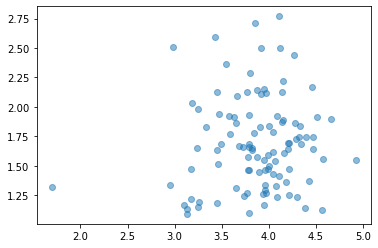

In [63]:
#TODO: plot the radius (x) versus cost to make (y)
plt.scatter(cookies['radius'], cookies['cost_to_make'], alpha=0.5)
plt.show()

We may even want to get more specific and visualize the shape of a distribution of the `laddoo lemon`'s radius by making a boxplot. We can also do this by using the `plot()` function.

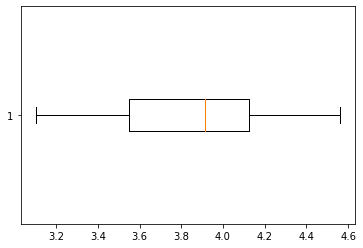

In [69]:
#TODO: add the described boxplot
# remember that you changed the name from laddoo lemon to laddoo

laddoo_cookies = cookies[cookies['cookie'] == 'laddoo_lemon']
plt.boxplot(laddoo_cookies['radius'], vert=False)
plt.show()

Alternatively, we can create a histogram to visualize the distribution of the `laddoo lemon`'s radius. We can also do this by using the `plot()` function.

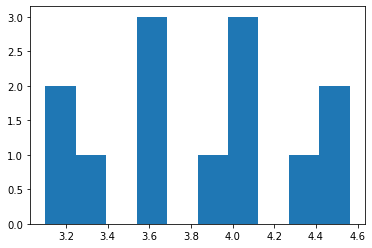

In [71]:
#TODO: add the described histogram

laddoo_cookies = cookies[cookies['cookie'] == 'laddoo_lemon']
plt.hist(laddoo_cookies['radius'])
plt.show()

Things can get more complicated too. Maybe we want to analyze the behaviors of `bad berry bunny` and `laddoo lemon`'s radius using a boxplot. But this time, let's try it using the alternative `boxplot()` function. For practice, try doing it with `plot()` too!

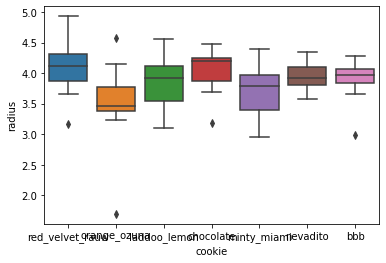

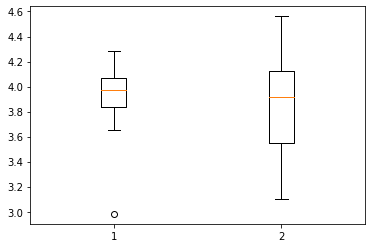

In [79]:
#TODO: analyze the two cookie's radius in a boxplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='cookie', y='radius', data=cookies)
plt.show()

bad_berry_bunny_data = cookies[cookies['cookie'] == 'bbb']
laddoo_data = cookies[cookies['cookie'] == 'laddoo_lemon']
plt.boxplot([bad_berry_bunny_data['radius'], laddoo_data['radius']])
plt.show()


### Practice Problems
Now that you have learned some of Pandas' capabilities, let's try some practice problems! **This is the part that will be checked when you submit it!**

#### Problem 1
How many cookies were made? (Hint: use the `shape` attribute)

In [83]:
num_cookies_made = cookies.shape[0]
print(num_cookies_made)

103


#### Problem 2
Add a column to the DataFrame that has the value `True` if the cookie has a radius greater than 4 cm, and `False` otherwise. (Hint: use the `apply()` function)

In [87]:
def Radius4cm(radius):
    return radius > 4.0

cookies['radius4cm'] = cookies['radius'].apply(Radius4cm)
print(cookies)

              cookie                                        ingredients  \
110  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
30   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
60      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
49      laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
101     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
..               ...                                                ...   
93       minty_miami          ["flour","mint extract","sugar","butter"]   
0       laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
22               bbb           ["flour","blueberries","sugar","butter"]   
32       minty_miami          ["flour","mint extract","sugar","butter"]   
78      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   

     calories  radius  cost_to_make  calories_per_radius  \
110       198   4.930          1.55    

#### Problem 3

Group the data by the `cookie` column, and find the average radius of each cookie. (Hint: use the `groupby()` and `transform()` function). Add this column to the DataFrame.

In [88]:
cookies['avgRadius'] = cookies.groupby('cookie')['radius'].transform('mean')
print(cookies)

              cookie                                        ingredients  \
110  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
30   red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
60      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
49      laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
101     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
..               ...                                                ...   
93       minty_miami          ["flour","mint extract","sugar","butter"]   
0       laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
22               bbb           ["flour","blueberries","sugar","butter"]   
32       minty_miami          ["flour","mint extract","sugar","butter"]   
78      orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   

     calories  radius  cost_to_make  calories_per_radius  \
110       198   4.930          1.55    

#### Problem 4
Create a new DataFrame that only contains the cookies that have the ingredient `"chocolate chips"`. (Hint: use the `str.contains()` function)

In [92]:
chocChip = cookies[cookies['ingredients'].str.contains('chocolate chips')]
print(chocChip)

        cookie                                        ingredients  calories  \
87   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
29    nevadito  ["flour","chocolate chips","milk","vanilla ext...       219   
62   chocolate       ["flour","chocolate chips","sugar","butter"]       206   
55   chocolate       ["flour","chocolate chips","sugar","butter"]       229   
48   chocolate       ["flour","chocolate chips","sugar","butter"]       240   
94   chocolate       ["flour","chocolate chips","sugar","butter"]       243   
64    nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
107  chocolate       ["flour","chocolate chips","sugar","butter"]       222   
36    nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
71    nevadito  ["flour","chocolate chips","milk","vanilla ext...       214   
121  chocolate       ["flour","chocolate chips","sug

#### Problem 5

Create a boxplot of `cost_to_make` for all cookies except `chocolate` using the `boxplot()` function.

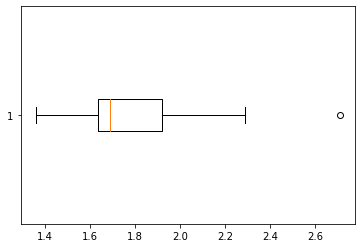

In [96]:
nonChoc_cookies = cookies[cookies['ingredients'].str.contains('chocolate')]
plt.boxplot(nonChoc_cookies['cost_to_make'], vert=False)
plt.show()


#### Problem 6

Create a histogram of the `bad berry bunny`'s calories using the `plot()` function.

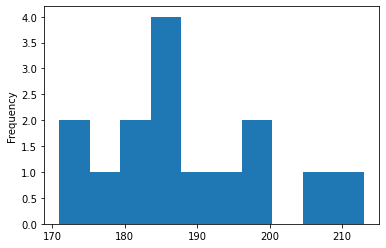

In [99]:
bbbC = cookies[cookies['cookie'] == 'bbb']
bbbC['calories'].plot(kind='hist')
plt.show()


#### Problem 7

Calculate the average calories per cookie type and display the result in a bar chart.

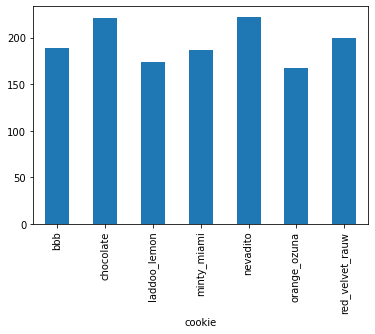

In [102]:
avgCalorie_cookie = cookies.groupby('cookie')['calories'].mean()
avgCalorie_cookie.plot(kind='bar')
plt.show()


#### Problem 8

Find the top 3 most expensive cookies in terms of cost_to_make

In [105]:
rankExpensive = cookies.sort_values(by='cost_to_make', ascending=False)
top3 = rankExpensive.head(3)
print(top3)


          cookie                                        ingredients  calories  \
42  laddoo_lemon             ["flour","lemon juice","sugar","ghee"]       176   
50      nevadito  ["flour","chocolate chips","milk","vanilla ext...       220   
13  orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]       159   

    radius  cost_to_make  calories_per_radius  radius_greater_than_4cm  \
42   4.110          2.77            42.822384                     True   
50   3.855          2.71            57.068742                    False   
13   3.429          2.59            46.369204                    False   

    average_radius  radius4cm  avgRadius  
42        3.849000       True   3.849000  
50        3.959000      False   3.959000  
13        3.506125      False   3.506125  
